<h1><center> Covid-19 Vaccination Data</center></h1>

With the help of some datasets from Kaggle we will try to determine if there is a relationship between number of vaccinations and deaths caused by Covid-19. We will also determine which vaccines were most commonly used and did the number of vaccinations affect the number of Covid-19 cases.

In [25]:
# Import dependencies required for the Project Work 
# Collections library is being used as a new library for this Project visulaizations. 
# Counter sub class is being used to count vacinnation types.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
import numpy as np
from collections import Counter

In [26]:
#Reading the csv files of datasets from Kaggle that have the data for Covid-19 vaccinations and deaths
df_vaccine_manufacturer = pd.read_csv('Resources/country_vaccinations_by_manufacturer.csv')
df_vaccine_data = pd.read_csv('Resources/country_vaccinations.csv')
df_covid_data = pd.read_csv('Resources/covid_data_cleaned.csv')

In [27]:
#Reading and inspecting the dataset
df_vaccine_manufacturer.head()

,location,date,vaccine,total_vaccinations
0,Argentina,2020-12-29,Moderna,2
1,Argentina,2020-12-29,Oxford/AstraZeneca,3
2,Argentina,2020-12-29,Sinopharm/Beijing,1
3,Argentina,2020-12-29,Sputnik V,20481
4,Argentina,2020-12-30,Moderna,2


In [28]:
#Reading and inspecting the dataset
df_vaccine_data.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [29]:
#Reading and inspecting the dataset
df_covid_data.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations
0,AFG,Asia,Afghanistan,24/02/20,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,25/02/20,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,26/02/20,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,27/02/20,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,28/02/20,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# Changing the date columns to datetime format so that all the datasets have same format if dataset
#Adjusting the format for better classification and cleaning of data

df_vaccine_manufacturer['date'] = pd.to_datetime(df_vaccine_manufacturer['date'])

df_vaccine_data['date'] = pd.to_datetime(df_vaccine_data['date'])

df_covid_data['date'] = pd.to_datetime(df_covid_data['date'], format='%d/%m/%y')


In [31]:
#Aggregating the data for better creating a dataset according to months

# Obtaining the year and month from the date column
# First df_vaccine_manufaturer dataframe months and years are being drawn from dates
df_vaccine_manufacturer['year'] = df_vaccine_manufacturer['date'].dt.year
df_vaccine_manufacturer['month'] = df_vaccine_manufacturer['date'].dt.month

# Aggregating and grouping three different datasets
# These datasets are df_vaccine_manufacturer, df_vaccine_data, and df_covid_data data and they are grouped by country, year, and month
#For this dataset we will sum the total vaccinations
df_vaccine_manufacturer_monthly = df_vaccine_manufacturer.groupby(['location', 'year', 'month']).agg({
    'total_vaccinations': 'sum' 
}).reset_index()

# Repeating the similar aggregation for the other datasets
#Fort the dataset df_vaccine_data we will sum the people vaccinated and people_fully_vaccinated
df_vaccine_data['year'] = df_vaccine_data['date'].dt.year
df_vaccine_data['month'] = df_vaccine_data['date'].dt.month
df_vaccine_data_monthly = df_vaccine_data.groupby(['location', 'year', 'month']).agg({'total_vaccinations': 'sum',
    'people_vaccinated': 'sum',
    'people_fully_vaccinated': 'sum'
}).reset_index()

#Aggregating and grouping the df_covid_data dataset similarly
# For this dataset we will sum total_cases, new_cases, total_deaths and new_deaths
df_covid_data['year'] = df_covid_data['date'].dt.year
df_covid_data['month'] = df_covid_data['date'].dt.month
df_covid_data_monthly = df_covid_data.groupby(['location', 'year', 'month']).agg({
    'total_cases': 'sum',
    'new_cases': 'sum',
    'total_deaths': 'sum',
    'new_deaths': 'sum'
}).reset_index()


In [32]:
# Combining the three aggregated datasets based on 'location', 'year', and 'month'
#Inner join is being used to combine these datasets
merged_df = pd.merge(df_vaccine_manufacturer_monthly, df_vaccine_data_monthly, on=['location', 'year', 'month'], how='inner')
merged_df = pd.merge(merged_df, df_covid_data_monthly, on=['location', 'year', 'month'], how='inner')

# Display the merged dataframe
merged_df.head()


,location,year,month,total_vaccinations_x,total_vaccinations_y,people_vaccinated,people_fully_vaccinated,total_cases,new_cases,total_deaths,new_deaths
0,Argentina,2020,12,104470,104470.0,104445.0,25.0,47136788.0,200981.0,1278031.0,4515.0
1,Argentina,2021,1,6729473,6729473.0,6055417.0,673599.0,55312462.0,301725.0,1412028.0,4729.0
2,Argentina,2021,2,20637015,20637015.0,14003718.0,6632562.0,56733848.0,180126.0,1407809.0,3991.0
3,Argentina,2021,3,86521743,86521743.0,70325290.0,16195445.0,68713761.0,241456.0,1674835.0,3893.0
4,Argentina,2021,4,191214278,191214278.0,166371920.0,24841032.0,79416752.0,628542.0,1774449.0,8007.0


Please note that people vaccinated means people that have got one dose of vaccination and people fully vaccinated means people that have got 2 doses of vaccination.

In [33]:
# Since there are two columns of total_vaccinations with same numbers
# We will drop the 'total_vaccinations_y' column to avoid any issues

merged_df = merged_df.drop(columns=['total_vaccinations_y'])

# We will rename 'total_vaccinations_x' to 'total_vaccinations' for better understanding
merged_df = merged_df.rename(columns={'total_vaccinations_x': 'total_vaccinations'})

# Display the result
merged_df.head()

,location,year,month,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_cases,new_cases,total_deaths,new_deaths
0,Argentina,2020,12,104470,104445.0,25.0,47136788.0,200981.0,1278031.0,4515.0
1,Argentina,2021,1,6729473,6055417.0,673599.0,55312462.0,301725.0,1412028.0,4729.0
2,Argentina,2021,2,20637015,14003718.0,6632562.0,56733848.0,180126.0,1407809.0,3991.0
3,Argentina,2021,3,86521743,70325290.0,16195445.0,68713761.0,241456.0,1674835.0,3893.0
4,Argentina,2021,4,191214278,166371920.0,24841032.0,79416752.0,628542.0,1774449.0,8007.0


Vaccine types need to be added to the dataframe. Therefore, changes need to be made to the merged dataset to accomodate the vaccine types.

In [34]:
# Assure that date is in datetime format so that there is no conflict when the dataframes are merged

df_vaccine_manufacturer['date'] = pd.to_datetime(df_vaccine_manufacturer['date'], errors='coerce')

# Obtaining the year and month from the date column of df_vaccine_manufacturer
df_vaccine_manufacturer['year'] = df_vaccine_manufacturer['date'].dt.year
df_vaccine_manufacturer['month'] = df_vaccine_manufacturer['date'].dt.month

# Grouping and aggregating by location, year, and month in df_vaccine_manufacturer dataframe
# Group-by operation to list the different types of vaccines used in each country, year, and month
df_vaccine_types = df_vaccine_manufacturer.groupby(['location', 'year', 'month'])['vaccine'].apply(lambda x: ', '.join(x.unique())).reset_index()

# Renaming the column of vaccines for better understanding
df_vaccine_types.rename(columns={'vaccine': 'vaccine_types_used'}, inplace=True)

# Display the result
df_vaccine_types.head()


,location,year,month,vaccine_types_used
0,Argentina,2020,12,"Moderna, Oxford/AstraZeneca, Sinopharm/Beijing..."
1,Argentina,2021,1,"Moderna, Oxford/AstraZeneca, Sinopharm/Beijing..."
2,Argentina,2021,2,"Moderna, Oxford/AstraZeneca, Sinopharm/Beijing..."
3,Argentina,2021,3,"CanSino, Moderna, Oxford/AstraZeneca, Sinophar..."
4,Argentina,2021,4,"CanSino, Moderna, Oxford/AstraZeneca, Pfizer/B..."


In [35]:
# Combining the vaccine types data into the existing merged_df
merged_df = pd.merge(merged_df, df_vaccine_types, on=['location', 'year', 'month'], how='left')

# Display the result
merged_df.head()

,location,year,month,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_cases,new_cases,total_deaths,new_deaths,vaccine_types_used
0,Argentina,2020,12,104470,104445.0,25.0,47136788.0,200981.0,1278031.0,4515.0,"Moderna, Oxford/AstraZeneca, Sinopharm/Beijing..."
1,Argentina,2021,1,6729473,6055417.0,673599.0,55312462.0,301725.0,1412028.0,4729.0,"Moderna, Oxford/AstraZeneca, Sinopharm/Beijing..."
2,Argentina,2021,2,20637015,14003718.0,6632562.0,56733848.0,180126.0,1407809.0,3991.0,"Moderna, Oxford/AstraZeneca, Sinopharm/Beijing..."
3,Argentina,2021,3,86521743,70325290.0,16195445.0,68713761.0,241456.0,1674835.0,3893.0,"CanSino, Moderna, Oxford/AstraZeneca, Sinophar..."
4,Argentina,2021,4,191214278,166371920.0,24841032.0,79416752.0,628542.0,1774449.0,8007.0,"CanSino, Moderna, Oxford/AstraZeneca, Pfizer/B..."


In [36]:
# Saving the merged dataframe to a CSV file
merged_df.to_csv('Resources/merged_covid_vaccine_data.csv', index=False)

After careful inspection of the merged_df dataframe we find out that all the countries do not have vaccine data available for all the months. And year 2022 and 2020 have inconsistent data. Therefore year 2021 is being examined because it was the year when most countries began large-scale vaccine distribution. 
Vaccines like Pfizer, Moderna, AstraZeneca, and others became widely available to the public. This makes it a crucial year for analyzing vaccine effectiveness, coverage, and impact.

In [37]:
#Extract and filter the dataset for the year 2021
# Step 1: ensuring the dataset in filtered by year
merged_df_2021 = merged_df[merged_df['year'] == 2021]

# Step 2: ensure each country has data for all 12 months (January to December) data available
# Group the merged_df_2021 by location and count the number of unique months for all countries in dataset
valid_countries = merged_df_2021.groupby('location')['month'].nunique()

# Ensure that all countries that have data for exactly 12 months
valid_countries = valid_countries[valid_countries == 12].index

# Step 3: Ensure the dataset to include only those valid countries
merged_df_2021_cleaned = merged_df_2021[merged_df_2021['location'].isin(valid_countries)]

# Display the result
merged_df_2021_cleaned.head()

,location,year,month,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_cases,new_cases,total_deaths,new_deaths,vaccine_types_used
1,Argentina,2021,1,6729473,6055417.0,673599.0,55312462.0,301725.0,1412028.0,4729.0,"Moderna, Oxford/AstraZeneca, Sinopharm/Beijing..."
2,Argentina,2021,2,20637015,14003718.0,6632562.0,56733848.0,180126.0,1407809.0,3991.0,"Moderna, Oxford/AstraZeneca, Sinopharm/Beijing..."
3,Argentina,2021,3,86521743,70325290.0,16195445.0,68713761.0,241456.0,1674835.0,3893.0,"CanSino, Moderna, Oxford/AstraZeneca, Sinophar..."
4,Argentina,2021,4,191214278,166371920.0,24841032.0,79416752.0,628542.0,1774449.0,8007.0,"CanSino, Moderna, Oxford/AstraZeneca, Pfizer/B..."
5,Argentina,2021,5,329376366,265625045.0,63748945.0,103825064.0,804421.0,2196043.0,14228.0,"CanSino, Moderna, Oxford/AstraZeneca, Pfizer/B..."


In [38]:
# Saving the cleaned dataframe for 2021 with all 12 months of data to a CSV file
merged_df_2021_cleaned.to_csv('Resources/merged_df_2021_cleaned.csv', index=False)

This csv file was imported to Sql database to house the data. Some queries were run to check the data and screenshots for that have been provided.

In [39]:
#Filter out the countries with reliable data
#Find out the names of countries in merged_df_2021_cleaned dataframe
country_names = merged_df_2021_cleaned['location'].unique()

#Display the result
country_names

array(['Argentina', 'Austria', 'Belgium', 'Bulgaria', 'Chile', 'Croatia',
       'Cyprus', 'Czechia', 'Denmark', 'Ecuador', 'Estonia', 'Finland',
       'France', 'Germany', 'Hungary', 'Ireland', 'Italy', 'Latvia',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
       'Norway', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia',
       'Spain', 'Sweden', 'Switzerland', 'United States'], dtype=object)

Almost all of these countries are developed countries so we can use data from all the data collected.

In [40]:
# Ten countries with the most cases of COVID-19
top_ten_cases = merged_df_2021_cleaned.groupby('location')['total_cases'].sum().sort_values(ascending=False).head(10)
top_ten_cases

location
United States    1.326266e+10
France           2.132204e+09
Italy            1.490063e+09
Spain            1.480288e+09
Argentina        1.440211e+09
Germany          1.375832e+09
Poland           9.778138e+08
Netherlands      6.358391e+08
Czechia          5.885192e+08
Chile            4.964051e+08
Name: total_cases, dtype: float64

In [41]:
# Ten countries with the most vaccinations
top_ten_vaccinations = merged_df_2021_cleaned.groupby('location')['total_vaccinations'].sum().sort_values(ascending=False).head(10)
top_ten_vaccinations

location
United States    96444028684
Germany          24386624551
France           20242613793
Italy            18026995904
Argentina        10739681902
Chile             7168387064
Ecuador           3792476068
Romania           2775200745
Czechia           2660980063
Switzerland       2366307369
Name: total_vaccinations, dtype: int64

In [42]:
# Ten countries with the most deaths from COVID-19
top_ten_deaths = merged_df_2021_cleaned.groupby('location')['total_deaths'].sum().sort_values(ascending=False).head(10)
top_ten_deaths

location
United States    223294299.0
Italy             43595671.0
France            38332112.0
Argentina         31681182.0
Germany           30901985.0
Spain             28644917.0
Poland            24394356.0
Romania           12271936.0
Chile             11113710.0
Czechia           10127999.0
Name: total_deaths, dtype: float64

# Covid-19 Vaccination Data Visualizations

For the visualizations first we should begin with a Correlation Heatmap since it will help us quickly assess the overall distribution and relationships between total vaccinations, people vaccinated, people fully vaccinated, total cases, new cases, total deaths and new deaths

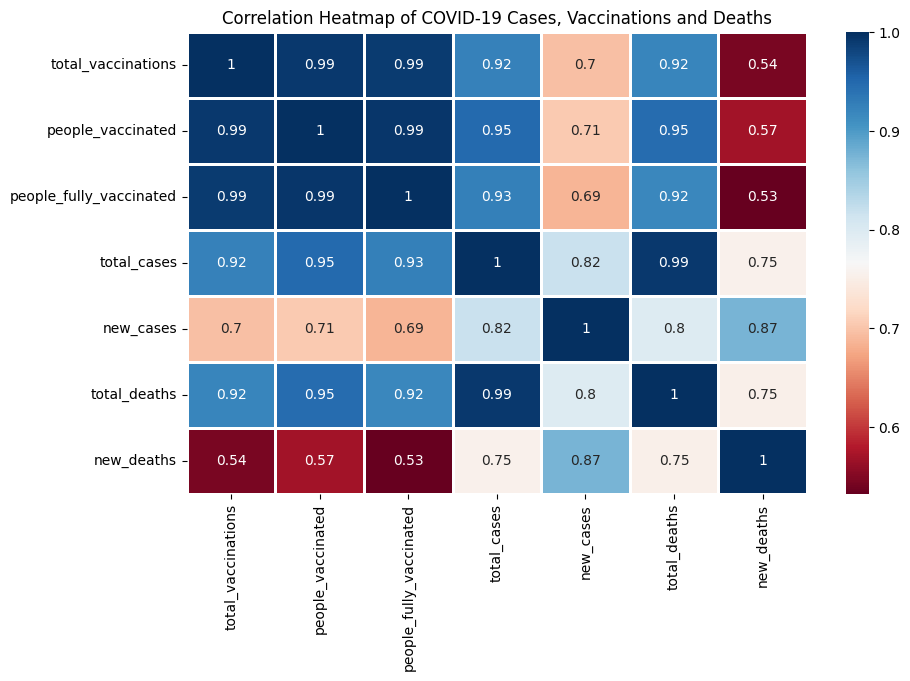

In [43]:
# Create corelation heatmap for exploring the dataset for patterns or relationships
# Choose the columns for the correlation matrix
correlation_columns = ['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_cases', 
'new_cases', 'total_deaths', 'new_deaths']

# Building the correlation matrix from the 2021 dataset
correlation_matrix = merged_df_2021_cleaned[correlation_columns].corr()

# Adding titles, colours and sizes to the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', linewidths=0.8)
plt.title('Correlation Heatmap of COVID-19 Cases, Vaccinations and Deaths')

#Display the heatmap
plt.show()

Analysis - From this Correaltion matrix we can see that total_vaccinations has a very strong positive correlation with people_vaccinated (0.99),people_fully_vaccinated (0.99) and total_cases (0.92) .
Total_cases has a very strong correlation with total_deaths (0.99), which is expected as more cases often lead to more deaths, especially before the widespread availability of vaccines. 

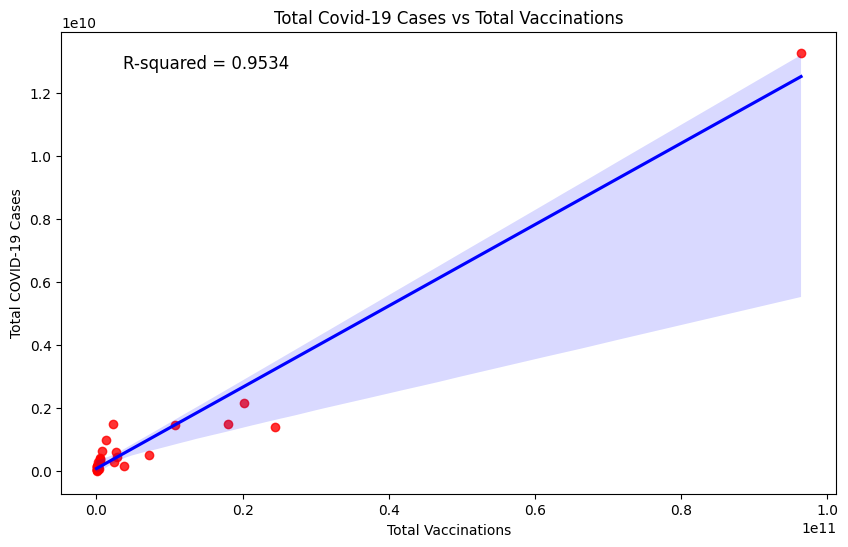

In [44]:
#Creating a scatter plot with regression line to compare total vacciantions adn total cases
#First we need to aggregate the dat for total vaccinations and total cases

data = merged_df_2021_cleaned.groupby('location').agg({
    'total_vaccinations': 'sum',
    'total_cases': 'sum' }).reset_index()

# Doing linear regression to get the R-squared value for the plot
slope, intercept, r_value, p_value, std_err = linregress(data['total_vaccinations'], data['total_cases'])

# Creating the scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='total_vaccinations', y='total_cases', data=data, line_kws={'color': 'blue'}, scatter_kws={'color': 'red'})

# Adding the R-squared value as text on the plot by giving coordinates
plt.text(0.08, 0.95, f'R-squared = {r_value**2:.4f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# Adding the labels and title
plt.xlabel("Total Vaccinations")
plt.ylabel("Total COVID-19 Cases")
plt.title("Total Covid-19 Cases vs Total Vaccinations")

# Display the plot
plt.show()

Analysis - There is a very strong positive correlation (0.9534) between total vaccinations and total deaths which suggests that in the dataset, as vaccinations increase, the total deaths also tend to increase. However, correlation does not mean causation it is possible that this happened due to countries with higher death tolls rolling out more vaccinations.

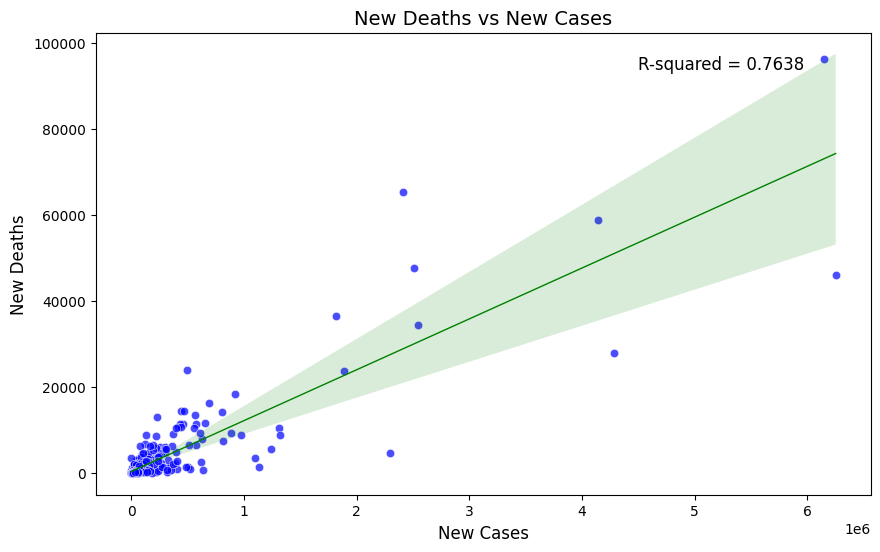

In [45]:
# Create a scatter plot to compare new deaths vs new cases
#Values gievn to x and y axis for the plot
# Calculating the regression statistics
x = merged_df_2021_cleaned['new_cases']
y = merged_df_2021_cleaned['new_deaths']
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Scatter plot size and colour
plt.figure(figsize=(10, 6))
sns.scatterplot(x='new_cases', y='new_deaths', data=merged_df_2021_cleaned, alpha=0.7, color='blue')

sns.regplot(x='new_cases', y='new_deaths', data=merged_df_2021_cleaned, scatter=False, color='green', line_kws={"linewidth": 1})

# Adding the R-squared value as text on the plot
# Creating the scatter plot with regression line
plt.text(0.7, 0.95, f'R-squared = {r_value**2:.4f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# Adding labels and title with fonts
plt.title("New Deaths vs New Cases", fontsize=14)
plt.xlabel("New Cases", fontsize=12)
plt.ylabel("New Deaths", fontsize=12)

# Display the plot
plt.show()


Analysis - This scatter plot visualizes the relationship between new deaths and new cases across countries, with a regression line and an R-squared value of 0.7638 which is a positive co-relation. This visualization shows that more new cases are generally associated with more new deaths, which is a crucial observation for public health measures.

In [46]:
# Read the merged_df_2021_cleaned csv file
df = pd.read_csv('Resources/merged_df_2021_cleaned.csv')

# Make sure this dataFrame is loaded correctly
df.head()

,location,year,month,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_cases,new_cases,total_deaths,new_deaths,vaccine_types_used
0,Argentina,2021,1,6729473,6055417.0,673599.0,55312462.0,301725.0,1412028.0,4729.0,"Moderna, Oxford/AstraZeneca, Sinopharm/Beijing..."
1,Argentina,2021,2,20637015,14003718.0,6632562.0,56733848.0,180126.0,1407809.0,3991.0,"Moderna, Oxford/AstraZeneca, Sinopharm/Beijing..."
2,Argentina,2021,3,86521743,70325290.0,16195445.0,68713761.0,241456.0,1674835.0,3893.0,"CanSino, Moderna, Oxford/AstraZeneca, Sinophar..."
3,Argentina,2021,4,191214278,166371920.0,24841032.0,79416752.0,628542.0,1774449.0,8007.0,"CanSino, Moderna, Oxford/AstraZeneca, Pfizer/B..."
4,Argentina,2021,5,329376366,265625045.0,63748945.0,103825064.0,804421.0,2196043.0,14228.0,"CanSino, Moderna, Oxford/AstraZeneca, Pfizer/B..."


Analysis - Creating two scatter plots to compare if the number of new cases got affected when people got vaccinated (1 dose of vaccination) or when people got fully vaccinated (2 doses).

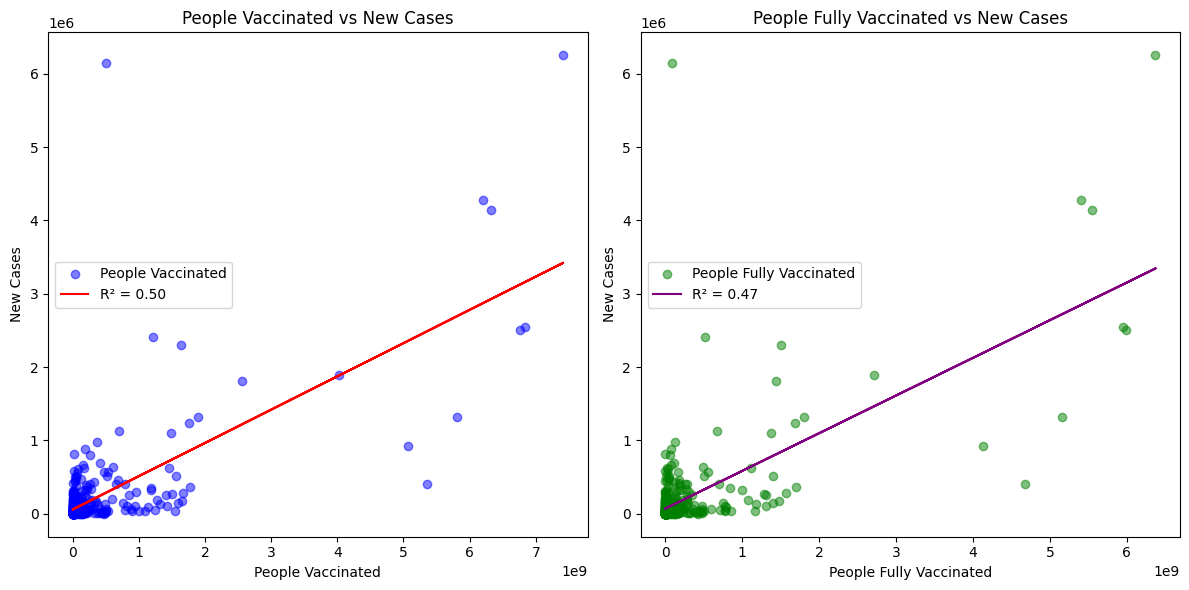

In [47]:
# Collecting the data for the scatter plots
# let x1 be people vaccinated and x2 be people fully vaccinated and y be new cases
x1 = df['people_vaccinated']  
x2 = df['people_fully_vaccinated']  
y = df['new_cases']

#Assign the plot size
plt.figure(figsize=(12, 6))

# Scatter plot for people vaccinated (1 dose) vs new cases
plt.subplot(1, 2, 1)
plt.scatter(x1, y, alpha=0.5, color='blue', label='People Vaccinated')
slope, intercept, r_value, p_value, std_err = linregress(x1, y)
#Dispaly the co-efficent value
plt.plot(x1, slope * x1 + intercept, color='red', label=f'R² = {r_value**2:.2f}')

#Adding lables and titles
plt.xlabel('People Vaccinated')
plt.ylabel('New Cases')
plt.title('People Vaccinated vs New Cases')
plt.legend()

# Scatter plot for people fully vaccinated (2 doses) vs new cases
plt.subplot(1, 2, 2)
plt.scatter(x2, y, alpha=0.5, color='green', label='People Fully Vaccinated')
slope, intercept, r_value, p_value, std_err = linregress(x2, y)
#Dispaly the co-efficent value
plt.plot(x2, slope * x2 + intercept, color='purple', label=f'R² = {r_value**2:.2f}')

#Adding lables and titles
plt.xlabel('People Fully Vaccinated')
plt.ylabel('New Cases')
plt.title('People Fully Vaccinated vs New Cases')
plt.legend()

plt.tight_layout()
#Display the plot
plt.show()

Analysis - Both the scatter plots show a moderate positive correlation between vaccination and new cases. It could be due to numerous other factors, such as vaccinations being rolled out when cases were high, meaning more cases occurred before vaccines could take full effect. The relationship here shows that as more people became fully vaccinated, new cases still increased, though the R-squared is slightly lower (0.47).

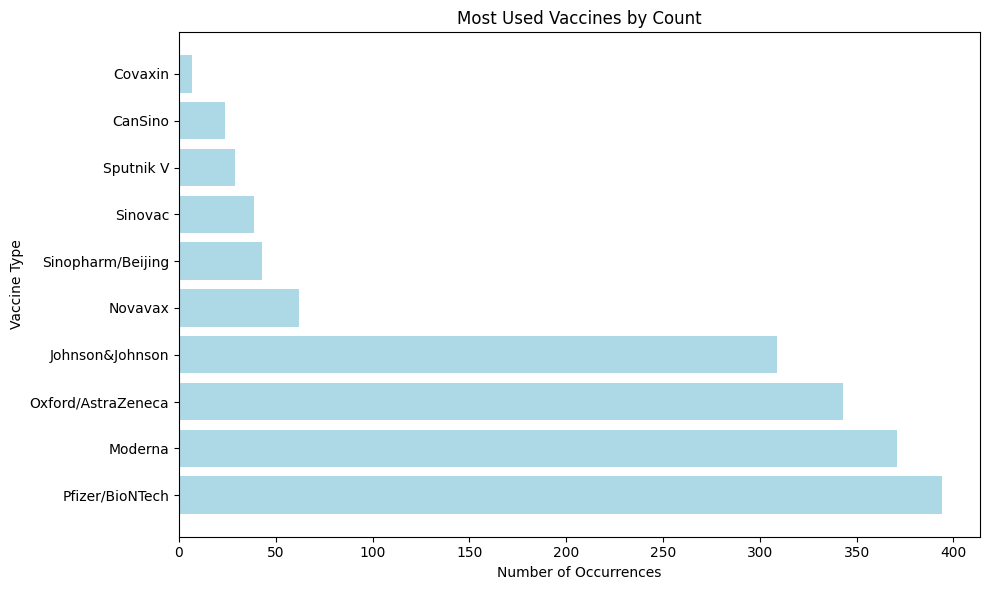

In [48]:
#Using the counter subclass from collections library to determine the most used vaccine in 2021
#Store the counts in a DataFrame and sort them by frequency
df = merged_df_2021_cleaned

# Split the vaccine types listed in the vaccine_types_used column into individual vaccines and count them
vaccine_counts = Counter()

# Count how many times each vaccine appears across all rows in the dataset
for vaccines in df['vaccine_types_used']:
    vaccine_list = vaccines.split(', ')
    vaccine_counts.update(vaccine_list)

# Converting the counter object to a DataFrame for easy plotting
vaccine_df = pd.DataFrame(vaccine_counts.items(), columns=['Vaccine', 'Count']).sort_values(by='Count', ascending=False)

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.barh(vaccine_df['Vaccine'], vaccine_df['Count'], color='lightblue')

#Adding lables and titles
plt.xlabel('Number of Occurrences')
plt.ylabel('Vaccine Type')
plt.title('Most Used Vaccines by Count')
plt.tight_layout()

# Display the plot
plt.show()

Analysis - From the graph we can state that Pfizer/BioNTech is the most used vaccine in year 2021 closely followed by Moderna.